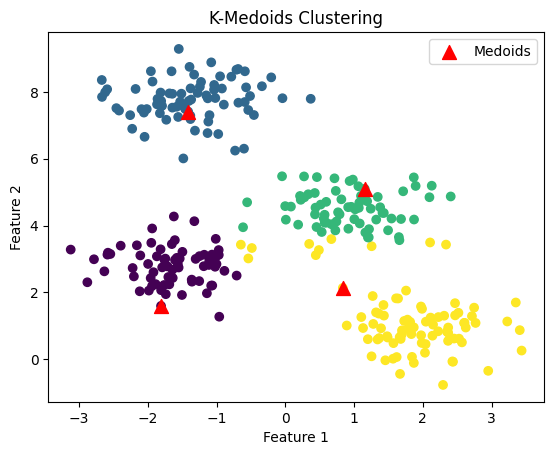

In [1]:
import numpy as np
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60,random_state=0)
n_clusters = 4
max_iter = 300
n_samples = X.shape[0]
cluster_centers_idx = np.random.choice(n_samples, n_clusters,replace=False)
cluster_centers = X[cluster_centers_idx]
for _ in range(max_iter):
    closest_medoids = pairwise_distances_argmin(X, cluster_centers)
    for i in range(n_clusters):
        cluster_points = X[closest_medoids == i]
        new_medoid =cluster_points[np.argmin(pairwise_distances_argmin(cluster_points,cluster_points))]
        cluster_centers[i] = new_medoid
labels = pairwise_distances_argmin(X, cluster_centers)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1],
marker='^', c='red', s=100, label='Medoids')
plt.title('K-Medoids Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()